# A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("../Starter_Code/whale_returns.csv")
whale_returns_data = pd.read_csv('whale_returns.csv')

# Count nulls
whale_returns_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [3]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna().copy()

# Validate nulls have been dropped
whale_returns_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [4]:
# Set the dates to a 'DateTimeIndex'
whale_returns_data.set_index(pd.to_datetime(whale_returns_data['Date'], infer_datetime_format=True), inplace=True)
whale_returns_data.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Remove the extra 'Date' column
whale_returns_data.drop(columns=['Date'], inplace=True)
whale_returns_data.head()

# Sort data from the earliest date to the latest date
whale_returns_data.sort_index(ascending=True)

# Change column names to 'SFM' 'PAULSON & CO', 'TIGER G. MNGMT', 'BRK' for convenience
whale_returns_data.columns = ['SFM', 'PAULSON & CO', 'TIGER G. MNGMT', 'BRK']
whale_returns_data.head()

,SFM,PAULSON & CO,TIGER G. MNGMT,BRK
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_data = Path("../Starter_Code/algo_returns.csv")
algo_returns_data = pd.read_csv('algo_returns.csv')

# Count nulls
algo_returns_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna().copy()

# Validate nulls have been dropped
whale_returns_data.isnull().sum()

SFM               0
PAULSON & CO      0
TIGER G. MNGMT    0
BRK               0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Set the dates to a 'DateTimeIndex'
algo_returns_data.set_index(pd.to_datetime(algo_returns_data['Date'], infer_datetime_format=True), inplace=True)
algo_returns_data

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN
...,...,...,...
2019-04-25,2019-04-25,0.000682,-0.007247
2019-04-26,2019-04-26,0.002981,0.005256
2019-04-29,2019-04-29,0.005208,0.002829


In [9]:
# Remove the extra 'Date' column
algo_returns_data.drop(columns=['Date'], inplace=True)

# Sort data from the earliest date to the latest date
algo_returns_data.sort_index(ascending=True)
algo_returns_data.head()

# Change column names to 'ALGO 1' and 'ALGO 2'
algo_returns_data.columns = ['ALGO 1', 'ALGO 2']
algo_returns_data

,ALGO 1,ALGO 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
# Reading S&P 500 Closing Prices
sp500_returns_data = Path("../Starter_Code/sp500_history.csv")
sp500_returns_data = pd.read_csv('sp500_history.csv', parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_returns_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp500_returns_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# Replace currency symbols
sp500_returns_data["Close"] = sp500_returns_data["Close"].str.replace("$", "")
sp500_returns_data["Close"]
sp500_returns_data.head()

# Convert 'Close' from 'Object' to 'Float'
sp500_returns_data["Close"] = sp500_returns_data["Close"].astype("float")
sp500_returns_data.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [13]:
# Check for nulls
sp500_returns_data.isnull().sum()

Close    0
dtype: int64

In [14]:
# Set the dates to a 'DateTimeIndex'
# Sort data from the earliest date to the latest date
sp500_returns_data = sp500_returns_data.sort_values(by=['Date'])
sp500_returns_data.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Check for nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [17]:
# Drop NAs
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename `Close` Column to be specific to this portfolio to convert the S&P 500 closing prices to daily returns.

sp500_returns_data = sp500_daily_returns.rename(columns={
    "Close": "S&P 500" 
})
sp500_returns_data.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns_data,algo_returns_data,sp500_returns_data], axis='columns', join='inner')

# Sort datetime index in ascending order (past to present)
all_portfolios.sort_index(ascending=True)
all_portfolios.head()

,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

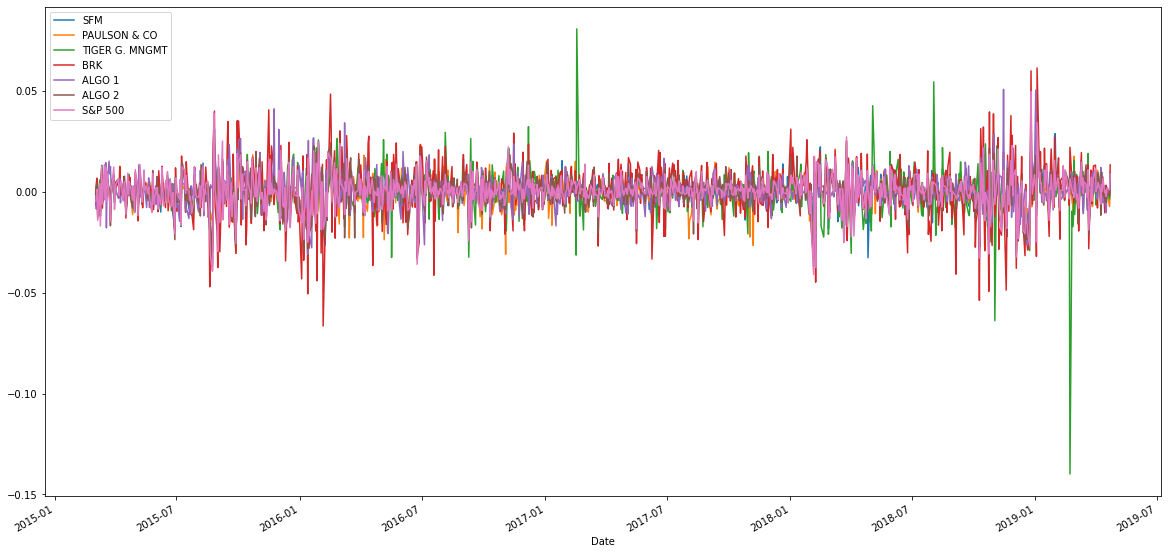

In [20]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

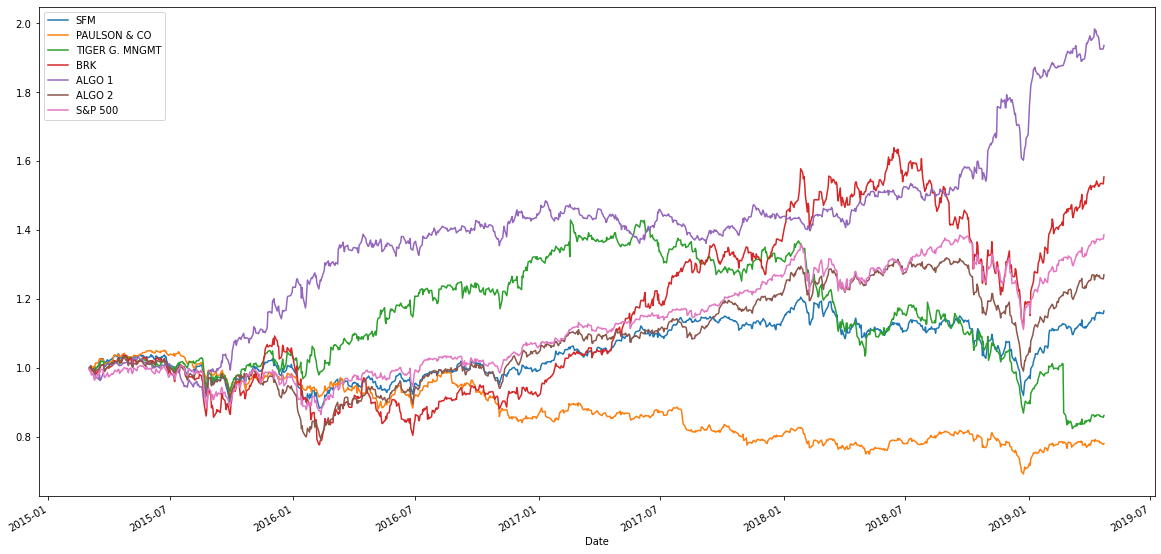

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'All Portfolio Risk'}>

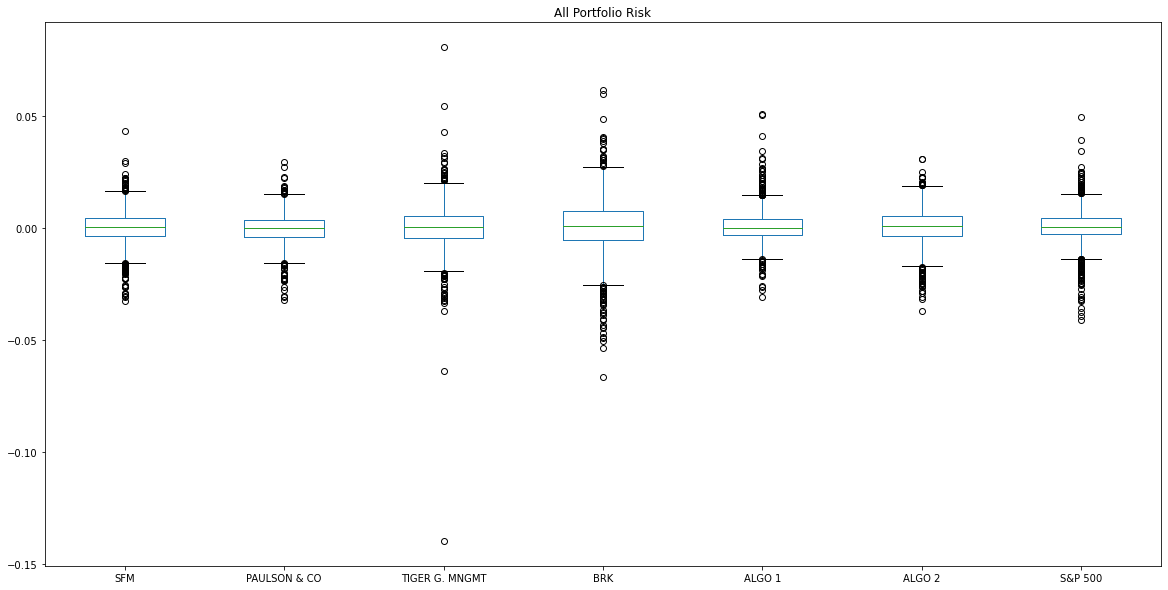

In [22]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20,10),title='All Portfolio Risk')

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
all_portfolios_daily_sd = all_portfolios.std()
all_portfolios_daily_sd

SFM               0.007895
PAULSON & CO      0.007023
TIGER G. MNGMT    0.010894
BRK               0.012919
ALGO 1            0.007620
ALGO 2            0.008342
S&P 500           0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_sd = sp500_returns_data.std()
sp500_daily_sd

S&P 500    0.008111
dtype: float64

In [25]:
# Determine which portfolios are riskier than the S&P 500
all_portfolios_daily_sd = all_portfolios_daily_sd.sort_values(ascending=False)
all_portfolios_daily_sd

BRK               0.012919
TIGER G. MNGMT    0.010894
S&P 500           0.008554
ALGO 2            0.008342
SFM               0.007895
ALGO 1            0.007620
PAULSON & CO      0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation (252 trading days)
annualized_sd = all_portfolios_daily_sd * np.sqrt(252)
annualized_sd

BRK               0.205077
TIGER G. MNGMT    0.172936
S&P 500           0.135786
ALGO 2            0.132430
SFM               0.125335
ALGO 1            0.120967
PAULSON & CO      0.111488
dtype: float64

### Answer: BRK and TIGER G. MNGMT are more riskier than S&P 500

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_rolling_sd = all_portfolios.rolling(window=21).std()
all_portfolios_rolling_sd

,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


In [29]:
# Drop NAs
all_portfolios_rolling_sd = all_portfolios_rolling_sd.dropna()
all_portfolios_rolling_sd

,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

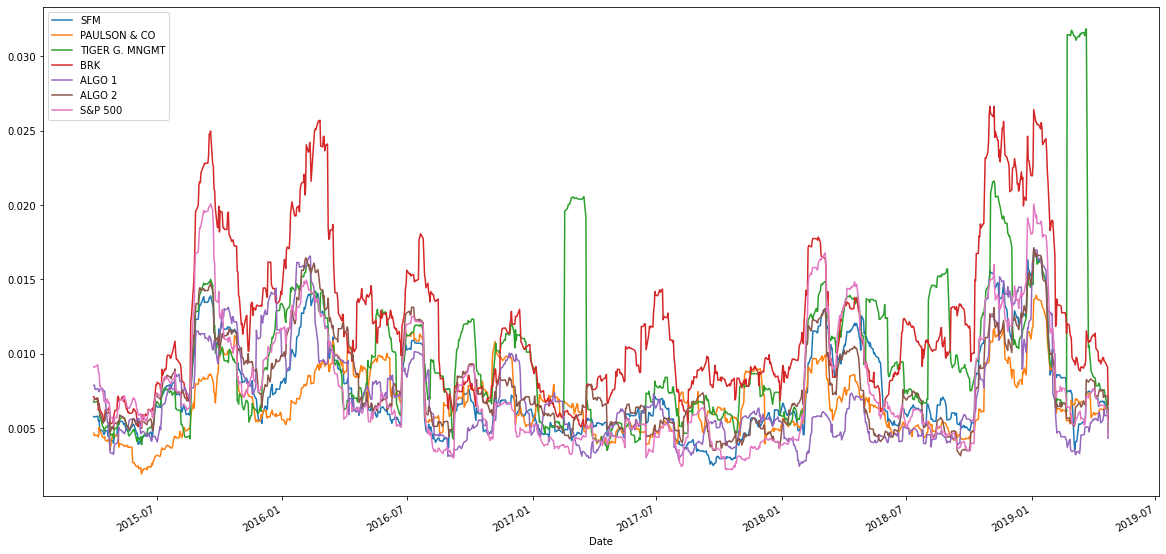

In [30]:
# Plot the rolling standard deviation
all_portfolios_rolling_sd.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

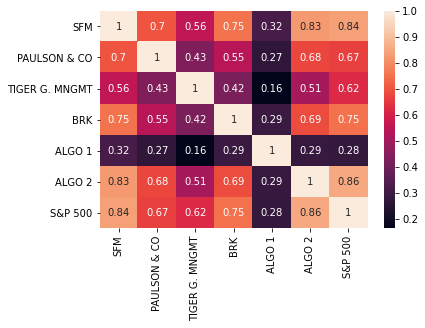

In [31]:
# Calculate the correlation
correlation = all_portfolios.corr()

# Display de correlation matrix
sns.heatmap(correlation, annot=True)

## Note: ALGO 2 from Algorithmic Portfolio seems to share similarity to S&P 500

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [33]:
# Calculate covariance of ALGO 1 daily returns and S&P 500 daily returns
covariance = all_portfolios['ALGO 1'].cov(all_portfolios['S&P 500'])
covariance

1.8217749991632826e-05

In [34]:
# Calculate 60-day rolling covariance 
rolling_covariance = all_portfolios['ALGO 1'].rolling(window=60).cov(all_portfolios['S&P 500'])
rolling_covariance.head()

Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
dtype: float64

In [35]:
# Calculate 60-day rolling variance of S&P 500
sp500_rolling_variance = all_portfolios['S&P 500'].rolling(window=60).var()
sp500_rolling_variance.head()

Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
Name: S&P 500, dtype: float64

In [36]:
# Computing beta
rolling_beta = rolling_covariance / sp500_rolling_variance
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 1043, dtype: float64

In [37]:
# Drop NAs 
rolling_beta = rolling_beta.dropna()
rolling_beta

Date
2015-05-27    0.164082
2015-05-28    0.160533
2015-05-29    0.150781
2015-06-01    0.146808
2015-06-02    0.127359
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 984, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta between ALGO 1 anfd S&P 500'}, xlabel='Date'>

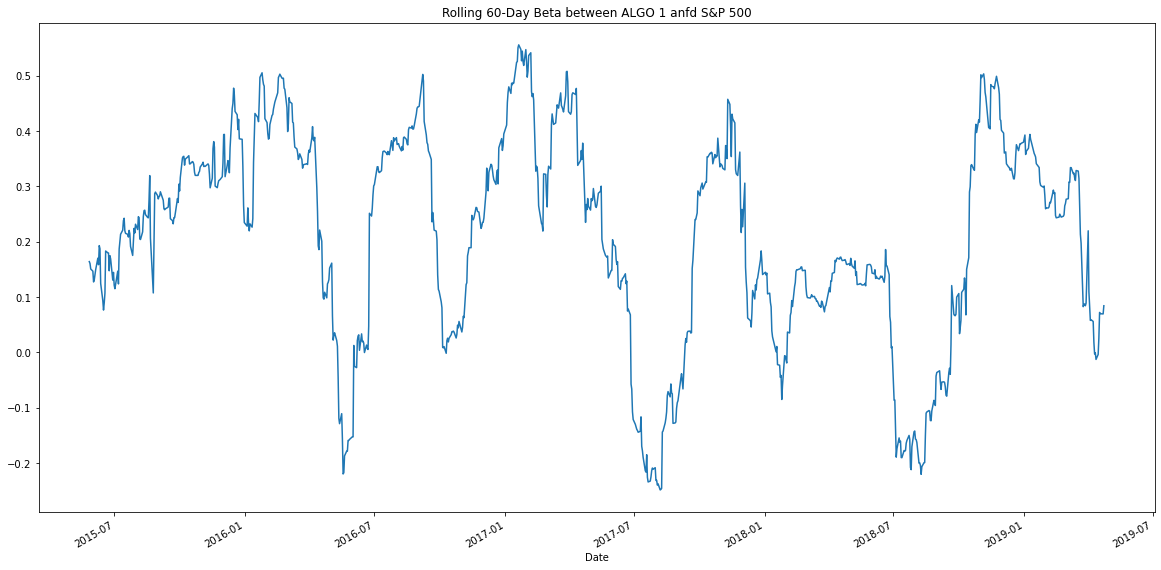

In [38]:
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta between ALGO 1 anfd S&P 500')

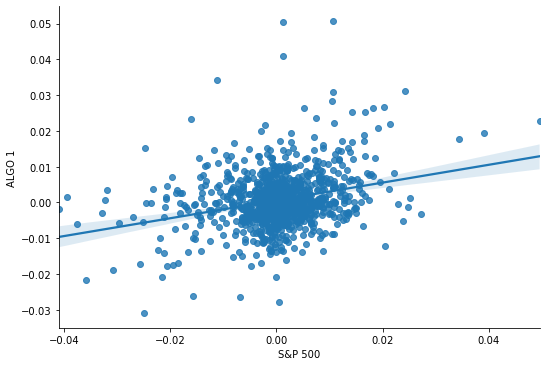

In [39]:
sns.lmplot(x='S&P 500', y='ALGO 1', data=all_portfolios, aspect=1.5, fit_reg=True,)

### Note: The graph shows the positive correlation between ALGO 1 and S&P 500. However, I am not certain if both of them are quite profitable

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [41]:
# Use `ewm` to calculate the rolling window
all_portfolios_ewm = all_portfolios.ewm(halflife=21).mean()
all_portfolios_ewm.head()

,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543


<AxesSubplot:xlabel='Date'>

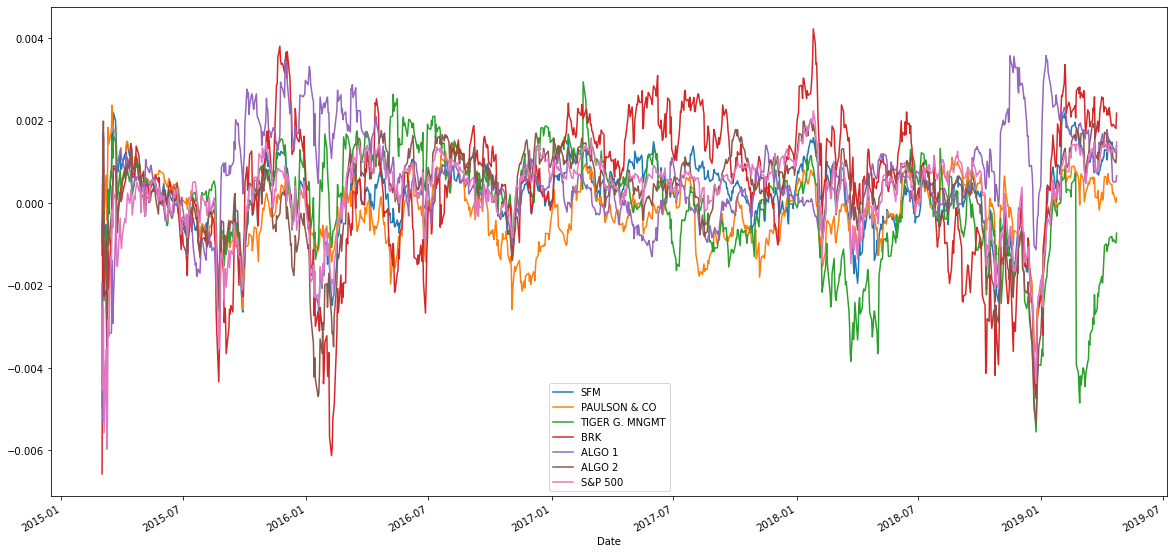

In [42]:
all_portfolios_ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios
sharpe_ratios = all_portfolios.mean() * 252 / (all_portfolios.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

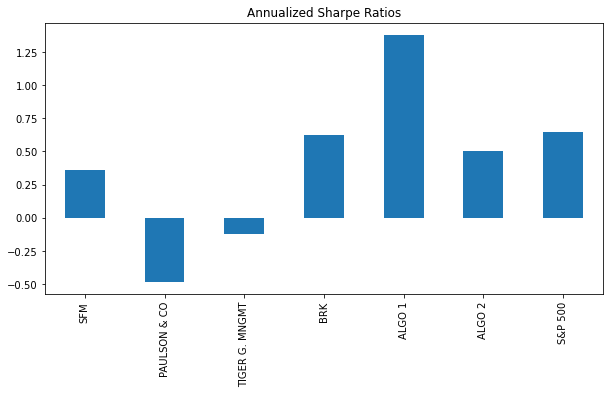

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(10, 5), title='Annualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The bar graph indicates one of the stock (ALGO 1) from Algorithmic Strategies tends to have the most returns as it is the hightest when compares to the others. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [59]:
# Reading data from 1st stock
GOOG_data = Path("../Starter_Code/goog_historical.csv")
GOOG_data = pd.read_csv('goog_historical.csv', index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Sort data from the earliest date to the latest date
GOOG_data = GOOG_data.sort_index(ascending=True)
GOOG_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [60]:
# Reading data from 2nd stock
AAPL_data = Path("../Starter_Code/aapl_historical.csv")
AAPL_data = pd.read_csv('aapl_historical.csv', index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Sort data from the earliest date to the latest date
AAPL_data = AAPL_data.sort_index(ascending=True)
AAPL_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [61]:
# Reading data from 3rd stock
COST_data = Path("../Starter_Code/cost_historical.csv")
COST_data = pd.read_csv('cost_historical.csv', index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

# Sort data from the earliest date to the latest date
COST_data = COST_data.sort_index(ascending=True)
COST_data.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [75]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([GOOG_data, AAPL_data, COST_data], axis="columns", join="inner")
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [77]:
# Reset Date index
combined_df.index = combined_df.index.normalize()
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60


In [78]:
# Reorganize portfolio data by having a column per symbol
# Remove the column 'Symbol' 
combined_df = combined_df.drop(columns=["Symbol"])

In [79]:
# Change column names to 'GOOG Close', 'AAPL Close', and 'COST Close'
combined_df.columns = ['GOOG Close', 'AAPL Close', 'COST Close']

# Sort data from the earliest date to the latest date
combined_df.sort_index(inplace=True)
combined_df.head()

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [80]:
# Calculate daily returns
combined_df_returns = combined_df.pct_change()
combined_df_returns.head()

# Change column names to 'GOOG', 'AAPL', and 'COST'
combined_df_returns.columns = ['GOOG', 'AAPL', 'COST']
combined_df_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [81]:
# Drop NAs
combined_df_returns = combined_df_returns.dropna()
combined_df_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [82]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = combined_df_returns.dot(weights)
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [83]:
# Sort data from the earliest date to the latest date
my_portfolio_returns.sort_index(ascending=True)

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [97]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([my_portfolio_returns, all_portfolios], axis = "columns", join = "inner")
combined_portfolios.head()

,0,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [100]:
# Name the column for my portfolio returns
combined_portfolios.rename(columns = {0:"GOOG/AAPL/COST"}, inplace = True)
combined_portfolios.head()

,GOOG/AAPL/COST,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [103]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios = combined_portfolios.dropna()
combined_portfolios.head()

,GOOG/AAPL/COST,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [104]:
# Calculate the annualized `std`
annualized_sd = combined_portfolios * np.sqrt(252)
annualized_sd.head()

,GOOG/AAPL/COST,SFM,PAULSON & CO,TIGER G. MNGMT,BRK,ALGO 1,ALGO 2,S&P 500
2018-05-14,0.000245,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025
2018-05-15,-0.159754,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616
2018-05-16,0.149272,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459
2018-05-17,-0.025317,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586
2018-05-18,-0.096209,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

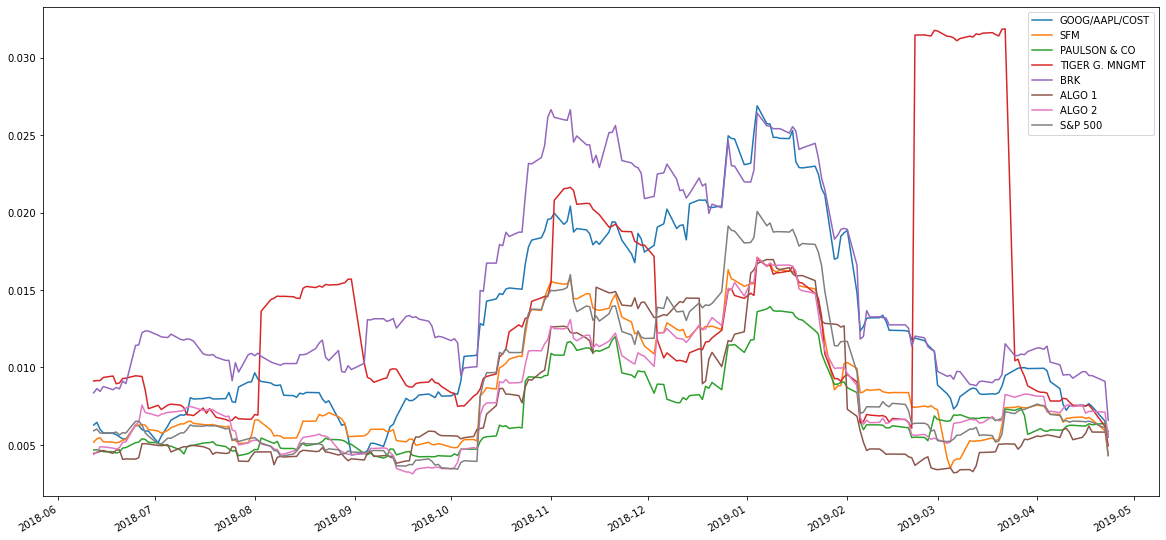

In [105]:
# Calculate rolling standard deviation
rolling_sd = combined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
rolling_sd.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

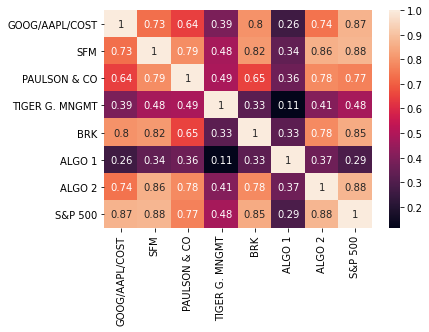

In [115]:
# Calculate and plot the correlation
correlation = combined_portfolios.corr()

# Display de correlation matrix
sns.heatmap(correlation, annot=True)

### Note:  Base on the graph and the correlation matrix, BRK is the only stock that seems to have similar movement to my stocks.Both also shared almost identical Standard Deviation from Jan-2019 to March-2019.  

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta between GOOG/AAPL/COST and S&P 500'}>

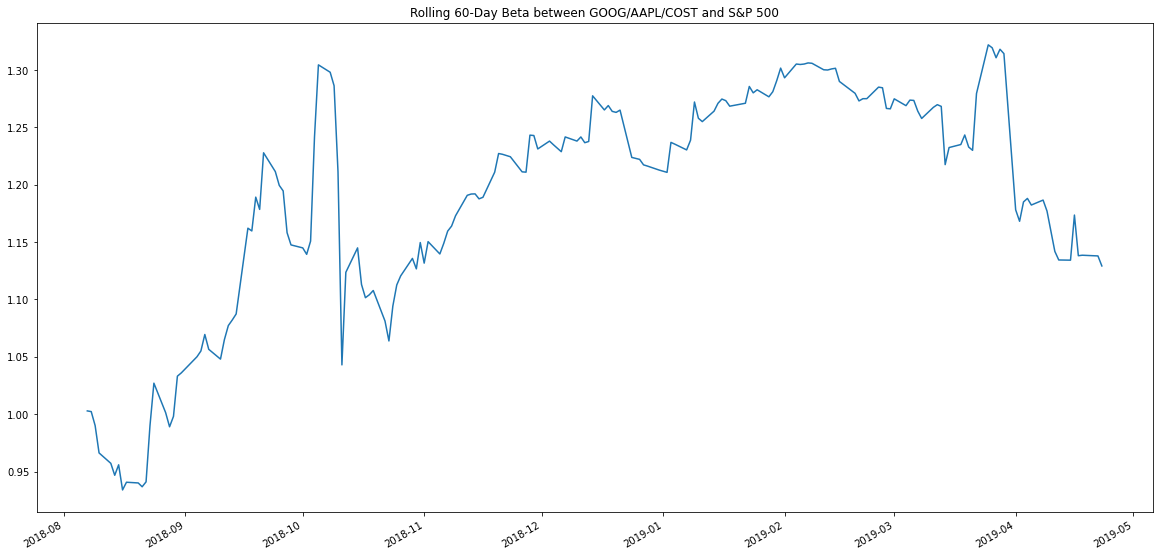

In [120]:
# Calculate covariance 
all_rolling_covariance = combined_portfolios['GOOG/AAPL/COST'].rolling(window=60).cov(combined_portfolios['S&P 500'])

# Calculate variance of S&P 500
sp500_rolling_variance = combined_portfolios['S&P 500'].rolling(window=60).var()

# Computing beta
rolling_beta = all_rolling_covariance / sp500_rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta between GOOG/AAPL/COST and S&P 500')

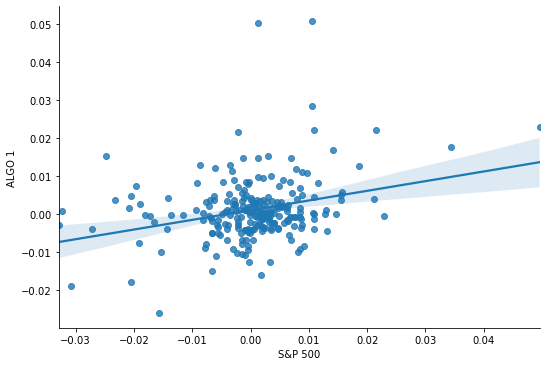

In [109]:
sns.lmplot(x='S&P 500', y='ALGO 1', data=combined_portfolios, aspect=1.5, fit_reg=True,)

### Note: The graph shows the weak positive correlation between GOOG/AAPL/COST and S&P 500. The volatility seems high with the chanche of low returns.

In [116]:
# Calculate the annualzied 'Sharpe Ratios'
annual_sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
annual_sharpe_ratios

GOOG/AAPL/COST    0.933123
SFM               0.430713
PAULSON & CO      0.258738
TIGER G. MNGMT   -1.034216
BRK               0.159756
ALGO 1            2.035665
ALGO 2            0.080607
S&P 500           0.584820
dtype: float64

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

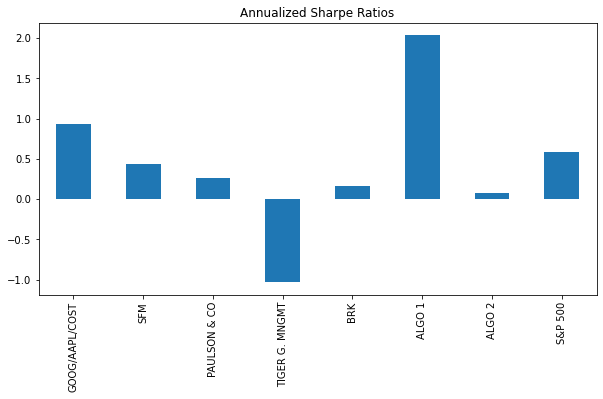

In [113]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe_ratios.plot.bar(figsize=(10, 5), title='Annualized Sharpe Ratios')

### How does your portfolio do?

### Based on the bar chart, ALGO 1's Sharpe Ratios has the highest level of annual Sharpe Ratios and pretty low Standard Deviation, while my portfolio is the second one but with higher Standard Deviation. I think I may decide to hold off on investing in those stocks and move forward with Harold's instead.  

### (Comments - I am going to need more time trying understand and get used to the formulas. Also, learning how to read the graph better)